<a href="https://colab.research.google.com/github/Nusnan-AM/JARTEST_models/blob/main/Linear_JAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
 catboost_info
'Colab Notebooks'
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of randomforest.ipynb'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_0115.JPG
 DSC_0116_1.JPG
 DSC_0117.JPG
 DSC_0119.JPG
 DSC_0124.JPG
 DSC_0125_1.JPG
 DSC_0127.JPG
 DSC_0128.JPG
 DSC_0129.JPG
 DSC_0130.JPG
 DSC_0131.JPG
 DSC_0140.JPG
 DSC_0143_1.JPG
 DSC_0146_1.JPG
 DSC_0147_1.JPG
 DSC_0148_1.JPG
 DSC_0148_2.JPG
 DSC_0149_1.JPG
 DSC_0150_1.JPG
 DSC_0152_1.JPG
 DSC_0154.JPG
 DSC_0156.JPG
 DSC_

In [ ]:
data =pd.read_csv("/content/gdrive/MyDrive/jartest.csv")

# Features

In [ ]:
X = data[['Raw_Turbidity', 'Raw_PH', 'Raw_Colour', 'PAC', 'KMnO4', 'ACD']]

y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

# Model development

## Turbidiy


In [ ]:
X_train, X_test, y_turbidity_train, y_turbidity_test = train_test_split(X, y_turbidity, test_size=0.2, random_state=42)

In [ ]:
model_turbidity = LinearRegression()

In [ ]:
model_turbidity.fit(X_train, y_turbidity_train)

LinearRegression()

## PH

In [ ]:
X_train, X_test, y_ph_train, y_ph_test = train_test_split(X, y_ph, test_size=0.2, random_state=42)

In [ ]:
model_ph = LinearRegression()

In [ ]:
model_ph.fit(X_train, y_ph_train)

LinearRegression()

## Colour

In [ ]:
X_train, X_test, y_colour_train, y_colour_test = train_test_split(X, y_colour, test_size=0.2, random_state=42)

In [ ]:
model_colour = LinearRegression()

In [ ]:
model_colour.fit(X_train, y_colour_train)

LinearRegression()

## Model Testing & Validation

In [ ]:
y_turbidity_pred = model_turbidity.predict(X_test)
y_turbidity_pred

array([ 9.22793575, 31.7281356 , 21.18468133, ..., 32.25713199,
       12.26240202, 10.98295097])

In [ ]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
4139,1.90,9.227936
586,22.00,31.728136
553,16.00,21.184681
227,19.00,16.655631
1321,11.56,17.882967
...,...,...
1433,13.50,18.215719
1018,13.00,18.012844
582,42.00,32.257132
203,16.00,12.262402


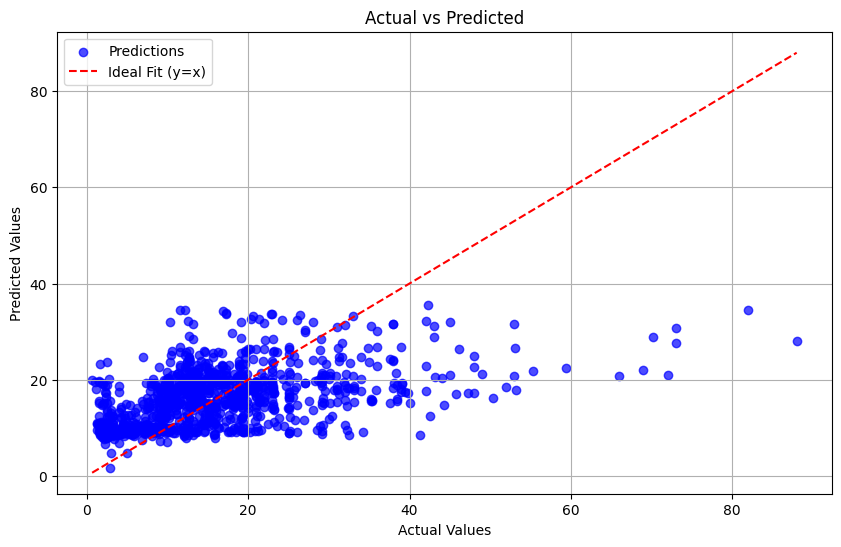

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_ph_pred = model_ph.predict(X_test)
y_ph_pred

array([7.5633899 , 6.89984079, 6.89616889, ..., 6.93028037, 7.04937676,
       7.38726766])

In [ ]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
4139,7.43,7.563390
586,6.92,6.899841
553,6.82,6.896169
227,7.00,6.903641
1321,6.85,6.934684
...,...,...
1433,6.91,6.890115
1018,6.67,6.787903
582,6.82,6.930280
203,7.13,7.049377


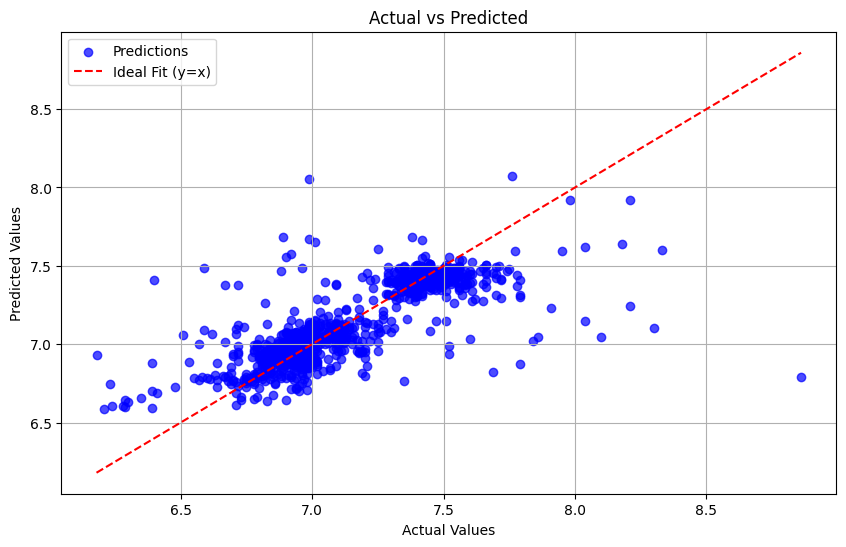

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_colour_pred = model_colour.predict(X_test)
y_colour_pred

array([41.72976522, 39.65782029, 60.17549028, ..., 50.20976972,
       29.13920965, 46.58267104])

In [ ]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})


results_Colo

,Actual,Predicted
4139,10.0,41.729765
586,17.0,39.657820
553,19.0,60.175490
227,20.0,38.401407
1321,26.0,54.397637
...,...,...
1433,28.0,33.190162
1018,33.0,40.551416
582,25.0,50.209770
203,130.0,29.139210


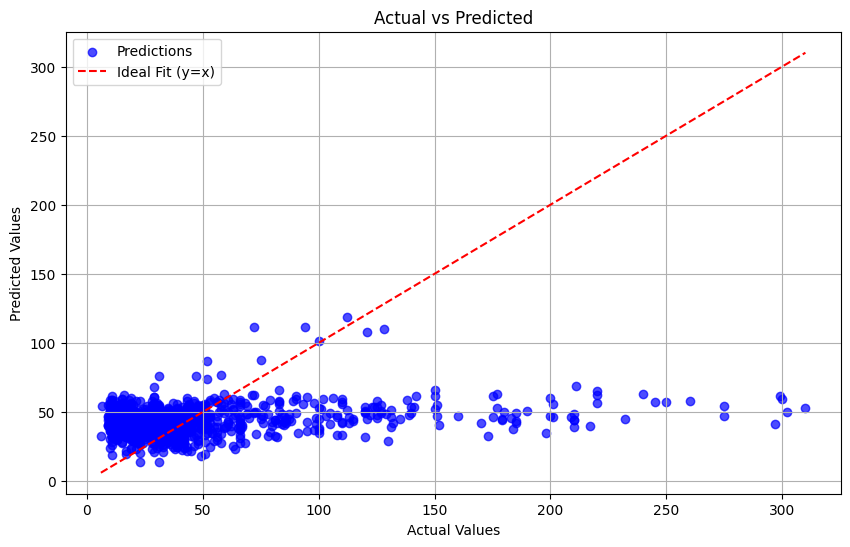

In [ ]:


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()




In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Accuracy: {accuracy:.2f}%")

evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")


Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 7.31
Mean Squared Error (MSE): 99.71
R-squared (R²): 0.21
Accuracy: 21.08%

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.04
R-squared (R²): 0.62
Accuracy: 61.65%

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 28.64
Mean Squared Error (MSE): 2025.74
R-squared (R²): 0.07
Accuracy: 6.79%


# Ridge and lassco